# Import libraries

In [1]:
# importing the requisite libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
# Import RFE
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

# Reading and understanding the data

In [2]:
# Reading the dataset

df = pd.read_csv("train.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df.describe

<bound method NDFrame.describe of         Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour 

In [6]:
df.shape

(1460, 81)

## Checking duplicate rows

In [7]:
duplicate = df[df.duplicated()]
duplicate

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


Inference: Since there are no dupliucates found, no row will be dropped.

## Data cleaning

In [8]:
# Remove ID column
# Remove columns with more than 80 percent null values
# columns_to_be_removed = ['Alley', 'PoolQC', 'MiscFeature']
df = df.drop(["Alley", "PoolQC", "MiscFeature", "Id"], axis = 1)


In [9]:
df.shape

(1460, 77)

In [10]:
df['Fence'].value_counts()

MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64

## Impute missing values

In [11]:
df["Fence"].fillna("NoFence", inplace = True)

In [12]:
df["GarageType"].fillna("NoGarage", inplace = True)

In [13]:
df["GarageQual"].fillna("NoGarage", inplace = True)

In [14]:
df["GarageCond"].fillna("NoGarage", inplace = True)

In [15]:
df["GarageFinish"].fillna("NoGarage", inplace = True)

In [16]:
df["FireplaceQu"].fillna("NoFireplace", inplace = True)

In [17]:
df["BsmtQual"].fillna("NoBasement", inplace = True)

In [18]:
df["BsmtCond"].fillna("NoBasement", inplace = True)

In [19]:
df["BsmtExposure"].fillna("NoBasement", inplace = True)

In [20]:
df["BsmtFinType1"].fillna("NoBasement", inplace = True)

In [21]:
df["BsmtFinType2"].fillna("NoBasement", inplace = True)

In [22]:
df["Electrical"].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

<Axes: >

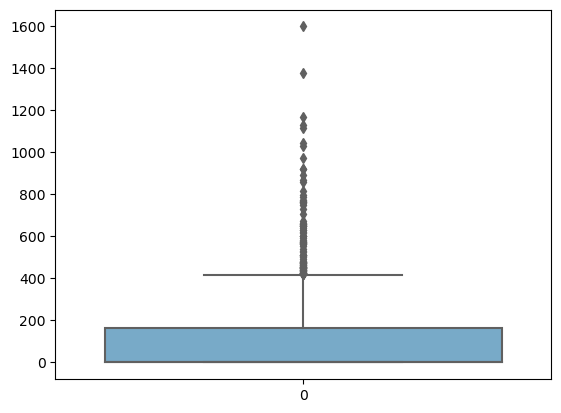

In [23]:
sns.boxplot([df.MasVnrArea], palette='Blues')

In [24]:
df.MasVnrArea.quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])

0.50      0.00
0.75    166.00
0.90    335.00
0.95    456.00
0.97    574.41
0.98    650.98
0.99    791.92
Name: MasVnrArea, dtype: float64

In [25]:
# as there are outliers preseent, impute missing values with median
df['MasVnrArea']= df.MasVnrArea.fillna(df.MasVnrArea.median())

In [26]:
df["MasVnrType"].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [27]:
# replace null value with None
df["MasVnrType"].fillna("None", inplace = True)

<Axes: >

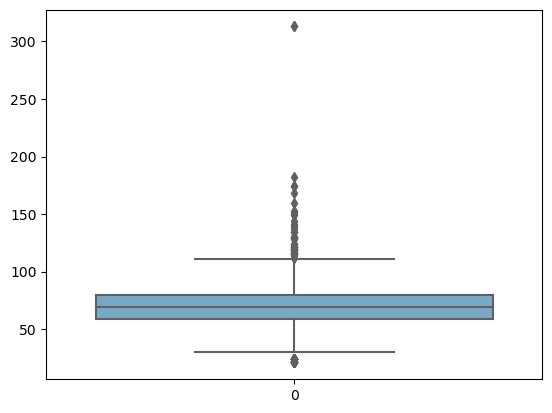

In [28]:
sns.boxplot([df.LotFrontage], palette='Blues')

In [29]:
df.LotFrontage.quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])

0.50     69.0
0.75     80.0
0.90     96.0
0.95    107.0
0.97    120.0
0.98    124.0
0.99    141.0
Name: LotFrontage, dtype: float64

In [30]:
# As we can see the outliers, impute missing values with median
df['LotFrontage']= df.LotFrontage.fillna(df.LotFrontage.median())

<Axes: >

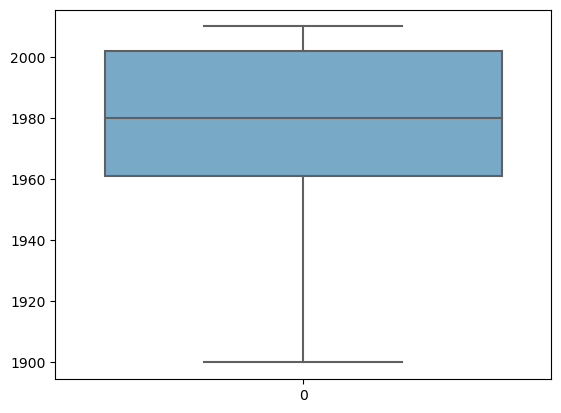

In [31]:
sns.boxplot([df.GarageYrBlt], palette='Blues')

In [32]:
# As there are no outliers, impute missing values with mean
df['GarageYrBlt']= df.GarageYrBlt.fillna(df.GarageYrBlt.mean())

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [34]:
#check missing percentage
percent_missing = (df.isnull().sum() / df.isnull().count()*100).sort_values(ascending = False)
percent_missing.head()

Electrical      0.068493
BedroomAbvGr    0.000000
GarageType      0.000000
FireplaceQu     0.000000
Fireplaces      0.000000
dtype: float64

In [35]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,NoFence,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,NoFence,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,NoFence,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,NoFence,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,NoFence,0,12,2008,WD,Normal,250000


<Axes: xlabel='SalePrice', ylabel='Density'>

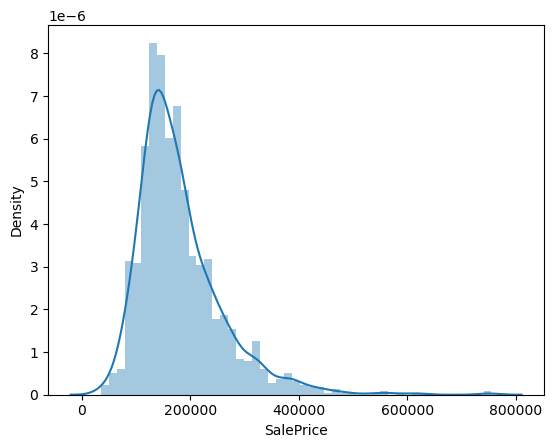

In [36]:
sns.distplot(df['SalePrice'])

In [37]:
#skewness and kurtosis
print("Skewness: %f" % df['SalePrice'].skew())

Skewness: 1.882876


In [38]:
df['SalePrice']=np.log(df.SalePrice) #tranforming to form normal disribution

<Axes: xlabel='SalePrice', ylabel='Density'>

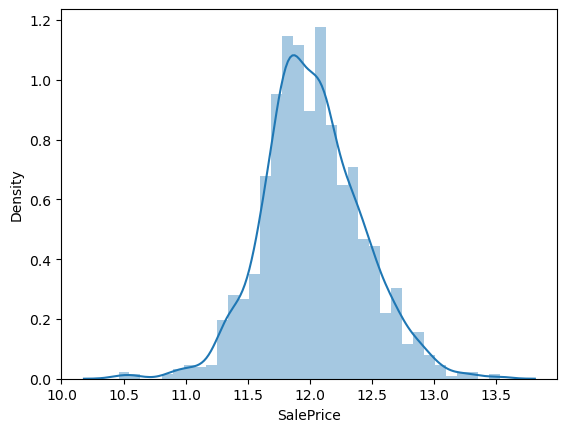

In [39]:
sns.distplot(df['SalePrice'])

In [40]:
#skewness and kurtosis
print("Skewness: %f" % df['SalePrice'].skew())

Skewness: 0.121335


In [41]:
# Since 91 % of the rows have value as SBrkr, column can be dropped(case of biased data)
df = df.drop(["Electrical"], axis = 1)

## Data encoding

In [42]:
# Encoding/mapping the MSSubClass column

df.MSSubClass = df.MSSubClass.map({20:'1-STORY 1946 & NEWER ALL STYLES',
        30:'1-STORY 1945 & OLDER',
        40:'1-STORY W/FINISHED ATTIC ALL AGES',
        45:'1-1/2 STORY - UNFINISHED ALL AGES',
        50:'1-1/2 STORY FINISHED ALL AGES',
        60:'2-STORY 1946 & NEWER',
        70:'2-STORY 1945 & OLDER',
        75:'2-1/2 STORY ALL AGES',
        80:'SPLIT OR MULTI-LEVEL',
        85:'SPLIT FOYER',
        90:'DUPLEX - ALL STYLES AND AGES',
       120:'1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
       150:'1-1/2 STORY PUD - ALL AGES',
       160:'2-STORY PUD - 1946 & NEWER',
       180:'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',
       190:'2 FAMILY CONVERSION - ALL STYLES AND AGES'})

In [43]:
# Encoding/mapping the OverallQual column
#df.OverallQual = df.OverallQual.astype(str)
df.OverallQual = df.OverallQual.map({10:'Very Excellent',
        9:'Excellent',
        8:'Very Good',
        7:'Good',
        6:'Above Average',
        5:'Average',
        4:'Below Average',
        3:'Fair',
        2:'Poor',
        1: 'Very Poor'})

In [44]:
# Encoding/mapping the OverallCond column
#df.OverallCond = df.OverallCond.astype(str)
df.OverallCond = df.OverallCond.map({10:'Very Excellent',
        9:'Excellent',
        8:'Very Good',
        7:'Good',
        6:'Above Average',
        5:'Average',
        4:'Below Average',
        3:'Fair',
        2:'Poor',
        1: 'Very Poor'})

In [45]:
# List Categorical columns 
df_cat_columns = df.select_dtypes(include=['object'])
df_cat_columns.columns

Index(['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'Fence',
       'SaleType', 'SaleCondition'],
      dtype='object')

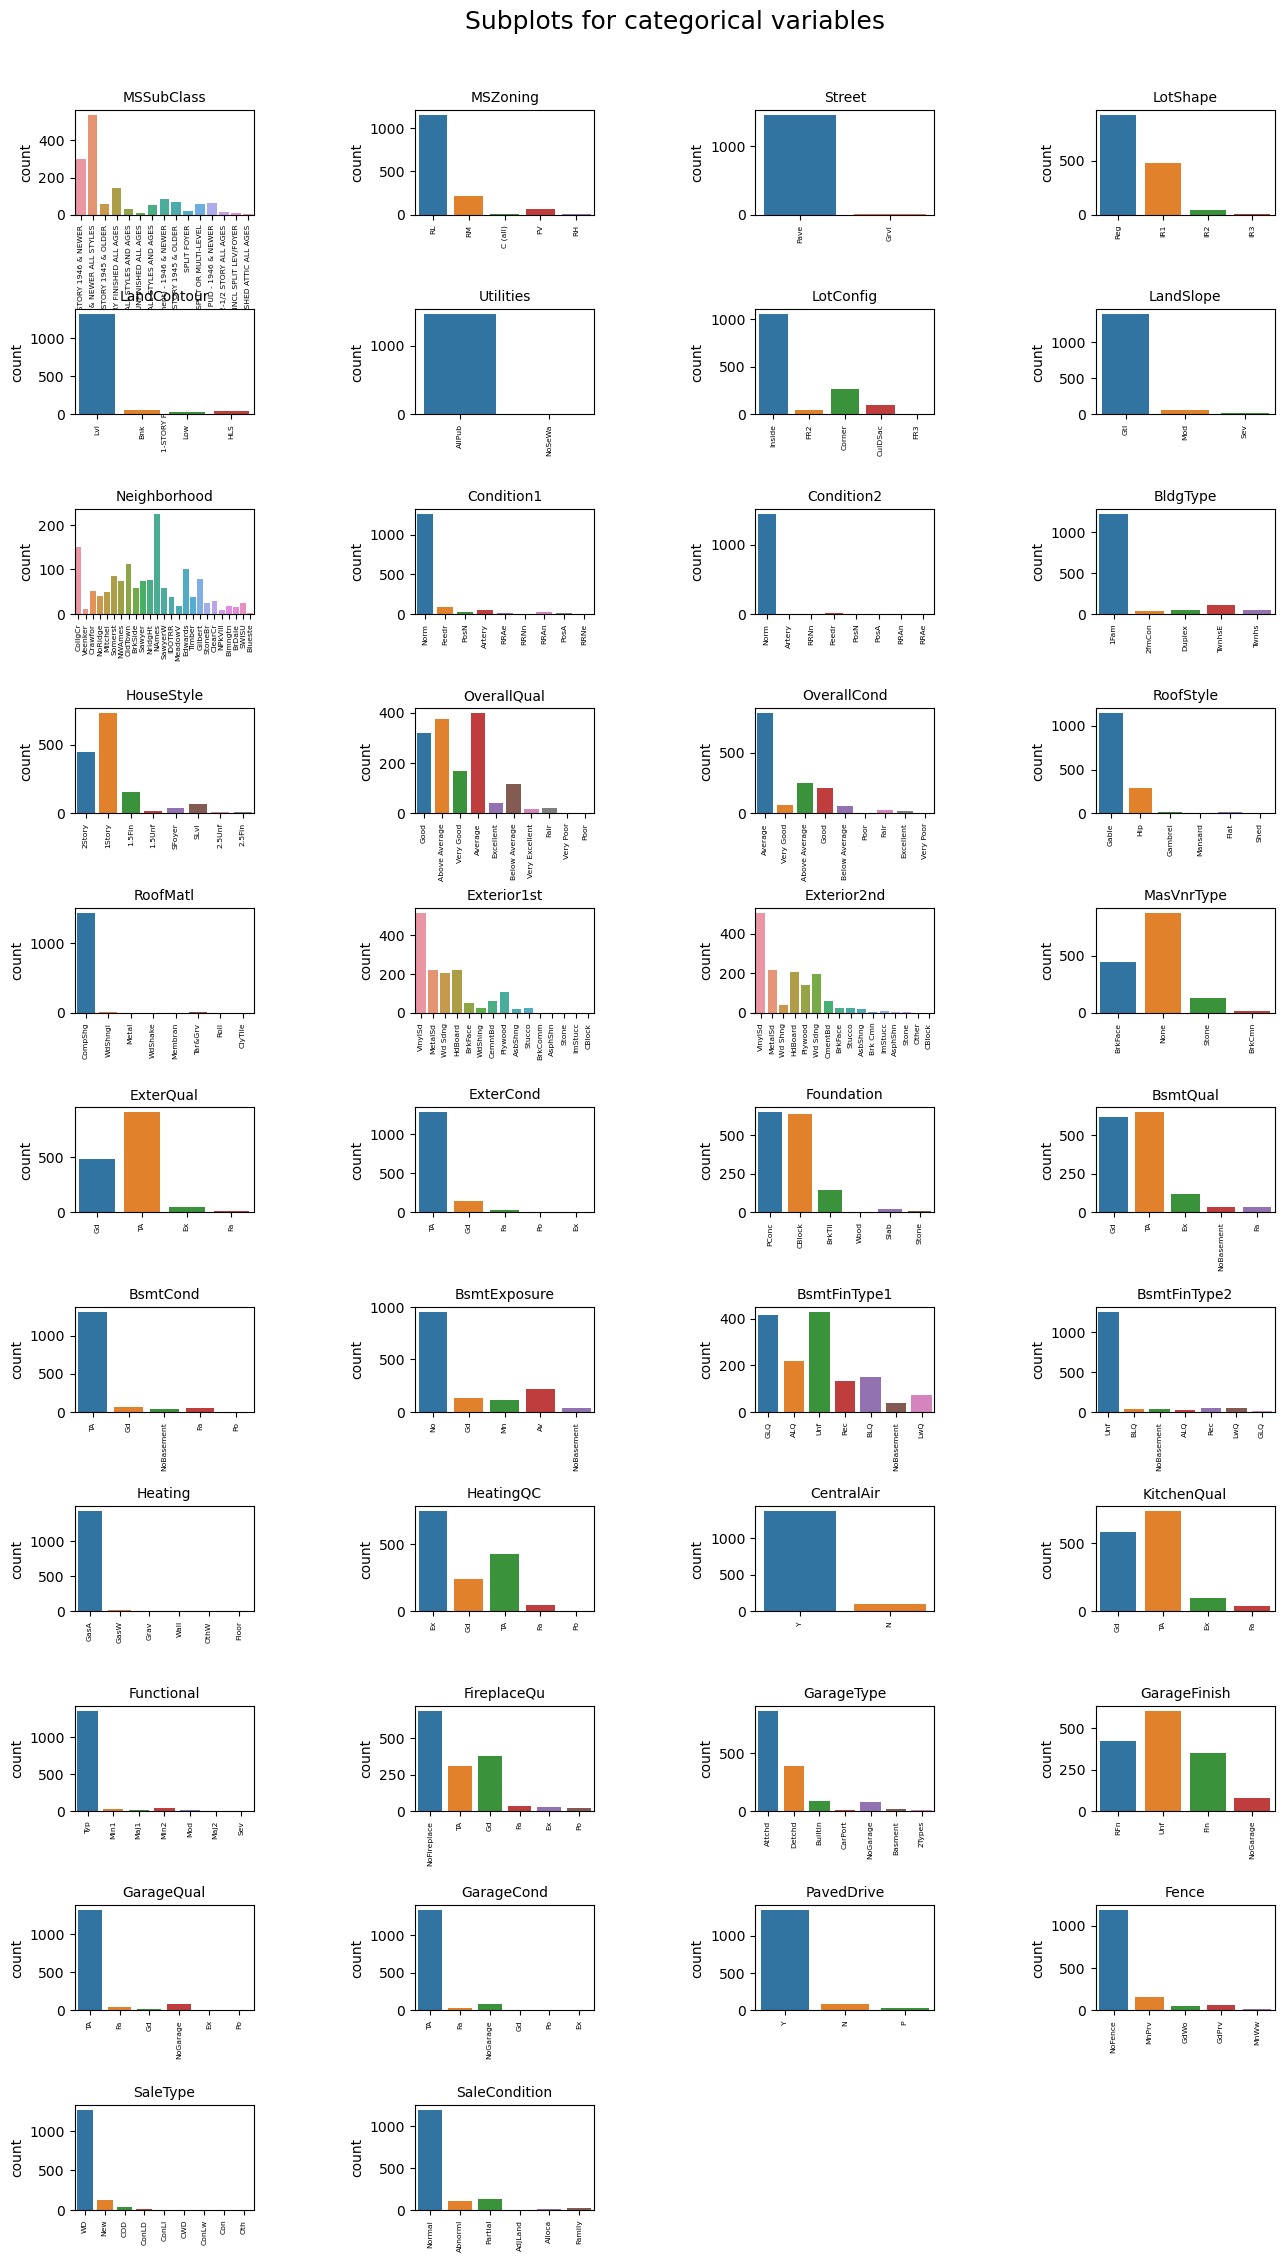

In [46]:
#  Visualize Categorical variables to analyse any bias in data.
fig = plt.figure(figsize = (15,25))
plt.suptitle("Subplots for categorical variables", fontsize = 18)
c = 1  # initialize plot counter
for i in df_cat_columns.columns:
    plt.subplot(11, 4, c)
    plt.title(i, fontsize=10)
    plt.xticks(fontsize=5.5, rotation=90)
    g=sns.countplot(data = df, x = i)
    g.set(xlabel=None)
    c = c + 1

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.94, 
                    wspace=0.9, 
                    hspace=0.9)
plt.tight_layout()
plt.show()

In [47]:
df['MSZoning'] = df['MSZoning'].replace(['C (all)','RH','FV'],'Others')
df['Foundation'] = df['Foundation'].replace(['Wood','Slab','Stone'],'Others')
df['GarageType'] = df['GarageType'].replace(['CarPort','Basment','2Types'],'Others')

In [48]:
df.MSZoning.value_counts()

RL        1151
RM         218
Others      91
Name: MSZoning, dtype: int64

In [49]:
df.Street.value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

In [50]:
df.LandContour.value_counts()

Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64

In [51]:
df.Utilities.value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

In [52]:
df.LandSlope.value_counts()

Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64

In [53]:
df.Condition2.value_counts()

Norm      1445
Feedr        6
Artery       2
RRNn         2
PosN         2
PosA         1
RRAn         1
RRAe         1
Name: Condition2, dtype: int64

In [54]:
df.BldgType.value_counts()

1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64

In [55]:
df.RoofMatl.value_counts()

CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
Metal         1
Membran       1
Roll          1
ClyTile       1
Name: RoofMatl, dtype: int64

In [56]:
df.BsmtCond.value_counts()

TA            1311
Gd              65
Fa              45
NoBasement      37
Po               2
Name: BsmtCond, dtype: int64

In [57]:
df.BsmtFinType2.value_counts()

Unf           1256
Rec             54
LwQ             46
NoBasement      38
BLQ             33
ALQ             19
GLQ             14
Name: BsmtFinType2, dtype: int64

In [58]:
df.Heating.value_counts()

GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64

In [59]:
df.CentralAir.value_counts()

Y    1365
N      95
Name: CentralAir, dtype: int64

In [60]:
df.Functional.value_counts()

Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: Functional, dtype: int64

In [61]:
df.GarageQual.value_counts()

TA          1311
NoGarage      81
Fa            48
Gd            14
Ex             3
Po             3
Name: GarageQual, dtype: int64

In [62]:
df.GarageCond.value_counts()

TA          1326
NoGarage      81
Fa            35
Gd             9
Po             7
Ex             2
Name: GarageCond, dtype: int64

In [63]:
df.PavedDrive.value_counts()

Y    1340
N      90
P      30
Name: PavedDrive, dtype: int64

In [64]:
df.Fence.value_counts()

NoFence    1179
MnPrv       157
GdPrv        59
GdWo         54
MnWw         11
Name: Fence, dtype: int64

In [65]:
df.SaleType.value_counts()

WD       1267
New       122
COD        43
ConLD       9
ConLI       5
ConLw       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64

In [66]:
df.SaleCondition.value_counts()

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

## Remove columns with highly skewed values

In [67]:
# skewed columns : Street, LandContour, Utilities, LandSlope, Condition2, RoofMatl, BsmtCond, BsmtFinType2, Heating, CentralAir, Functional, GarageQual,GarageCond, PavedDrive, Fence, SaleType, SaleCondition 
df.drop(['Street', 'LandContour', 'Utilities', 'LandSlope', 'Condition2', 'RoofMatl', 'BsmtCond', 'BsmtFinType2', 'Heating', 'CentralAir', 'Functional', 'GarageQual', 'GarageCond', 'PavedDrive', 'Fence', 'SaleType', 'SaleCondition'], axis=1, inplace=True)

In [68]:
df_cat_columns = df.select_dtypes(include=['object'])
df_cat_columns.columns

Index(['MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood',
       'Condition1', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1',
       'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageType',
       'GarageFinish'],
      dtype='object')

# Data Visualization: Categorical variables vs target varibale i.e. SalePrice

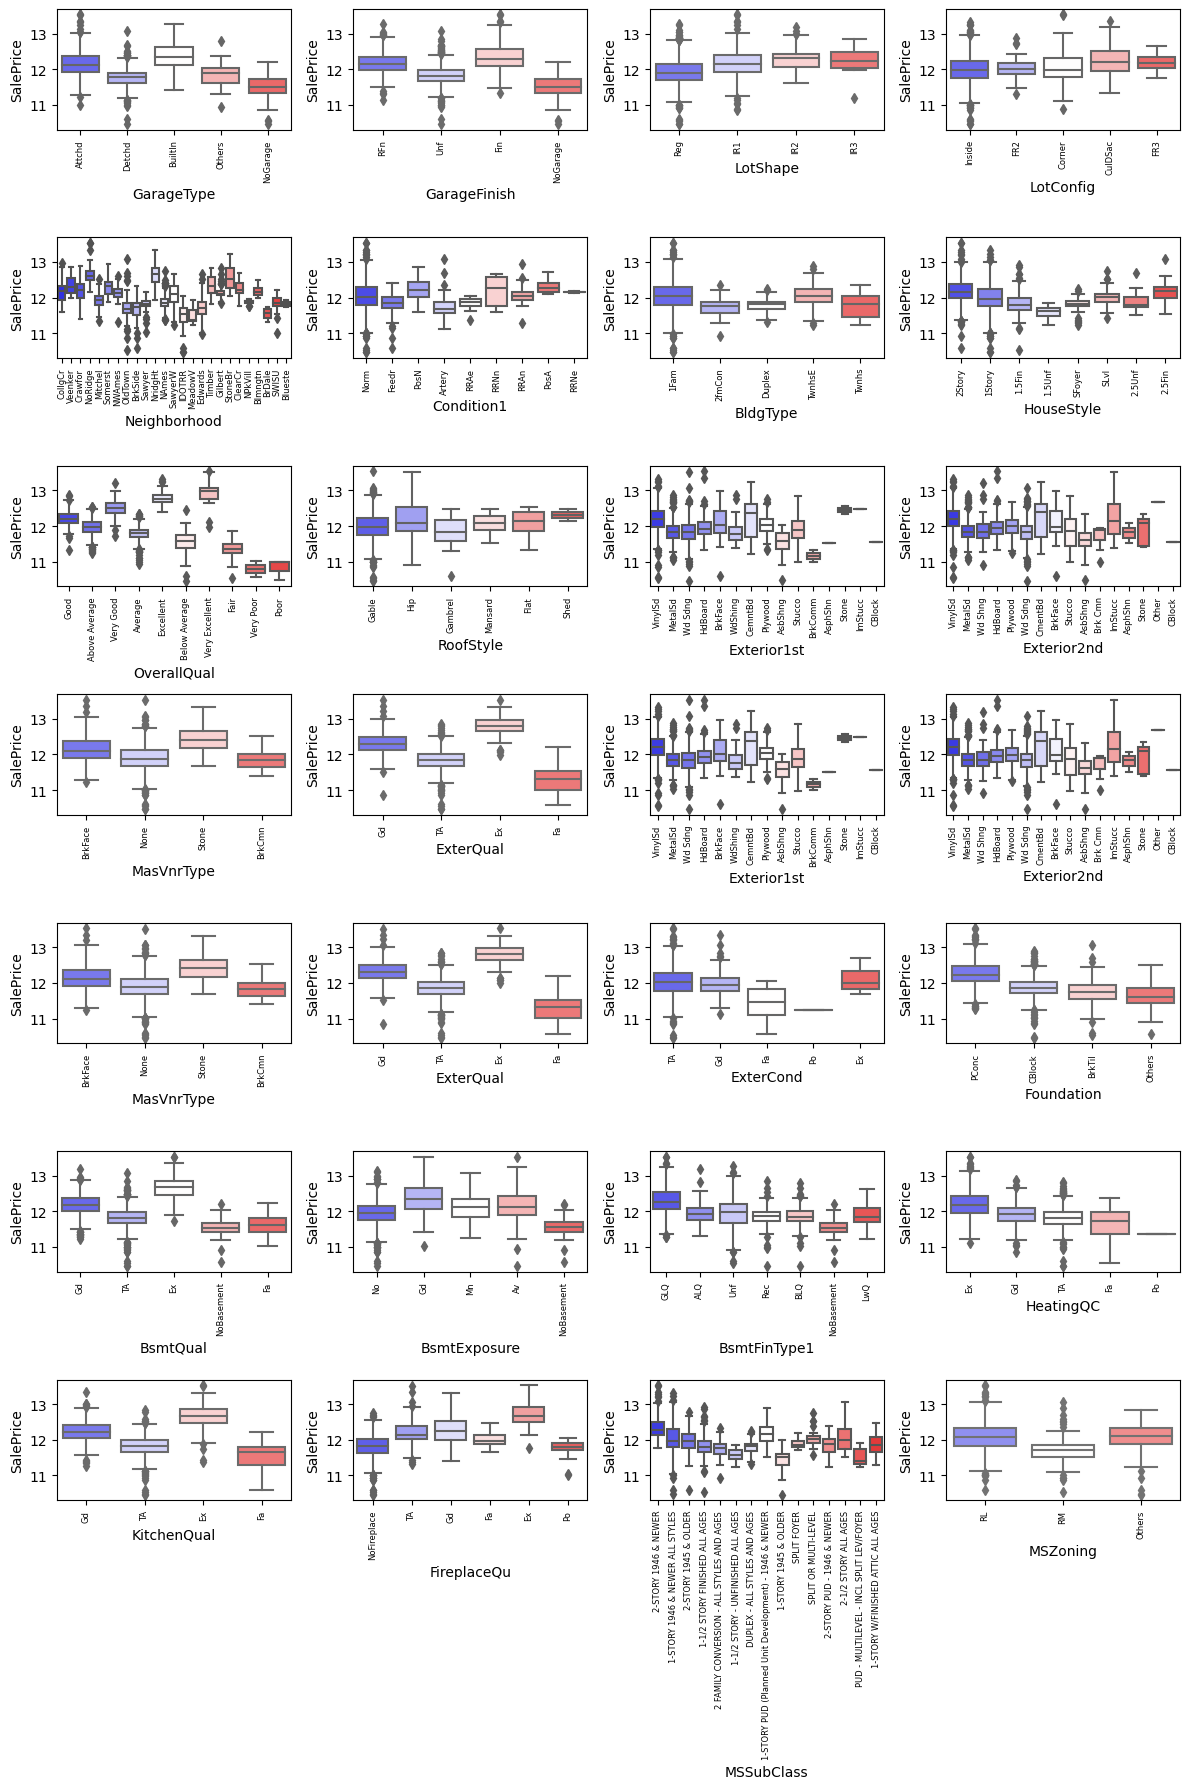

In [69]:
plt.figure(figsize=(12, 18))
plt.subplot(7,4,1)
sns.boxplot(x = 'GarageType', y = 'SalePrice', data = df, palette='bwr')
plt.xticks(fontsize=6, rotation=90)
plt.subplot(7,4,2)
sns.boxplot(x = 'GarageFinish', y = 'SalePrice', data = df, palette='bwr')
plt.xticks(fontsize=6, rotation=90)
plt.subplot(7,4,3)
sns.boxplot(x = 'LotShape', y = 'SalePrice', data = df, palette='bwr')
plt.xticks(fontsize=6, rotation=90)
plt.subplot(7,4,4)
sns.boxplot(x = 'LotConfig', y = 'SalePrice', data = df, palette='bwr')
plt.xticks(fontsize=6, rotation=90)
plt.subplot(7,4,5) 
sns.boxplot(x = 'Neighborhood', y = 'SalePrice', data = df, palette='bwr')
plt.xticks(fontsize=6, rotation=90)
plt.subplot(7,4,6)
sns.boxplot(x = 'Condition1', y = 'SalePrice', data = df, palette='bwr')
plt.xticks(fontsize=6, rotation=90)
plt.subplot(7,4,7)
sns.boxplot(x = 'BldgType', y = 'SalePrice', data = df, palette='bwr')
plt.xticks(fontsize=6, rotation=90)
plt.subplot(7,4,8)
sns.boxplot(x = 'HouseStyle', y = 'SalePrice', data = df, palette='bwr')
plt.xticks(fontsize=6, rotation=90)
plt.subplot(7,4,9)
sns.boxplot(x = 'OverallQual', y = 'SalePrice', data = df, palette='bwr')
plt.xticks(fontsize=6, rotation=90)
plt.subplot(7,4,10)
sns.boxplot(x = 'RoofStyle', y = 'SalePrice', data = df, palette='bwr')
plt.xticks(fontsize=6, rotation=90)
plt.subplot(7,4,11)
sns.boxplot(x = 'Exterior1st', y = 'SalePrice', data = df, palette='bwr')
plt.xticks(fontsize=6, rotation=90)
plt.subplot(7,4,12)
sns.boxplot(x = 'Exterior2nd', y = 'SalePrice', data = df, palette='bwr')
plt.xticks(fontsize=6, rotation=90)
plt.subplot(7,4,13)
sns.boxplot(x = 'MasVnrType', y = 'SalePrice', data = df, palette='bwr')
plt.xticks(fontsize=6, rotation=90)
plt.subplot(7,4,14)
sns.boxplot(x = 'ExterQual', y = 'SalePrice', data = df, palette='bwr')
plt.xticks(fontsize=6, rotation=90)
plt.subplot(7,4,15)
sns.boxplot(x = 'Exterior1st', y = 'SalePrice', data = df, palette='bwr')
plt.xticks(fontsize=6, rotation=90)
plt.subplot(7,4,16)
sns.boxplot(x = 'Exterior2nd', y = 'SalePrice', data = df, palette='bwr')
plt.xticks(fontsize=6, rotation=90)
plt.subplot(7,4,17)
sns.boxplot(x = 'MasVnrType', y = 'SalePrice', data = df, palette='bwr')
plt.xticks(fontsize=6, rotation=90)
plt.subplot(7,4,18)
sns.boxplot(x = 'ExterQual', y = 'SalePrice', data = df, palette='bwr')
plt.xticks(fontsize=6, rotation=90)
plt.subplot(7,4,19)
sns.boxplot(x = 'ExterCond', y = 'SalePrice', data = df, palette='bwr')
plt.xticks(fontsize=6, rotation=90)
plt.subplot(7,4,20)
sns.boxplot(x = 'Foundation', y = 'SalePrice', data = df, palette='bwr')
plt.xticks(fontsize=6, rotation=90)
plt.subplot(7,4,21)
sns.boxplot(x = 'BsmtQual', y = 'SalePrice', data = df, palette='bwr')
plt.xticks(fontsize=6, rotation=90)
plt.subplot(7,4,22)
sns.boxplot(x = 'BsmtExposure', y = 'SalePrice', data = df, palette='bwr')
plt.xticks(fontsize=6, rotation=90)
plt.subplot(7,4,23)
sns.boxplot(x = 'BsmtFinType1', y = 'SalePrice', data = df, palette='bwr')
plt.xticks(fontsize=6, rotation=90)
plt.subplot(7,4,24)
sns.boxplot(x = 'HeatingQC', y = 'SalePrice', data = df, palette='bwr')
plt.xticks(fontsize=6, rotation=90)
plt.subplot(7,4,25)
sns.boxplot(x = 'KitchenQual', y = 'SalePrice', data = df, palette='bwr')
plt.xticks(fontsize=6, rotation=90)
plt.subplot(7,4,26)
sns.boxplot(x = 'FireplaceQu', y = 'SalePrice', data = df, palette='bwr')
plt.xticks(fontsize=6, rotation=90)
plt.subplot(7,4,27)
sns.boxplot(x = 'MSSubClass', y = 'SalePrice', data = df, palette='bwr')
plt.xticks(fontsize=6, rotation=90)
plt.subplot(7,4,28)
sns.boxplot(x = 'MSZoning', y = 'SalePrice', data = df, palette='bwr')
plt.xticks(fontsize=6, rotation=90)



plt.tight_layout()
plt.show()

## Visualizing correlation between indepedent variables

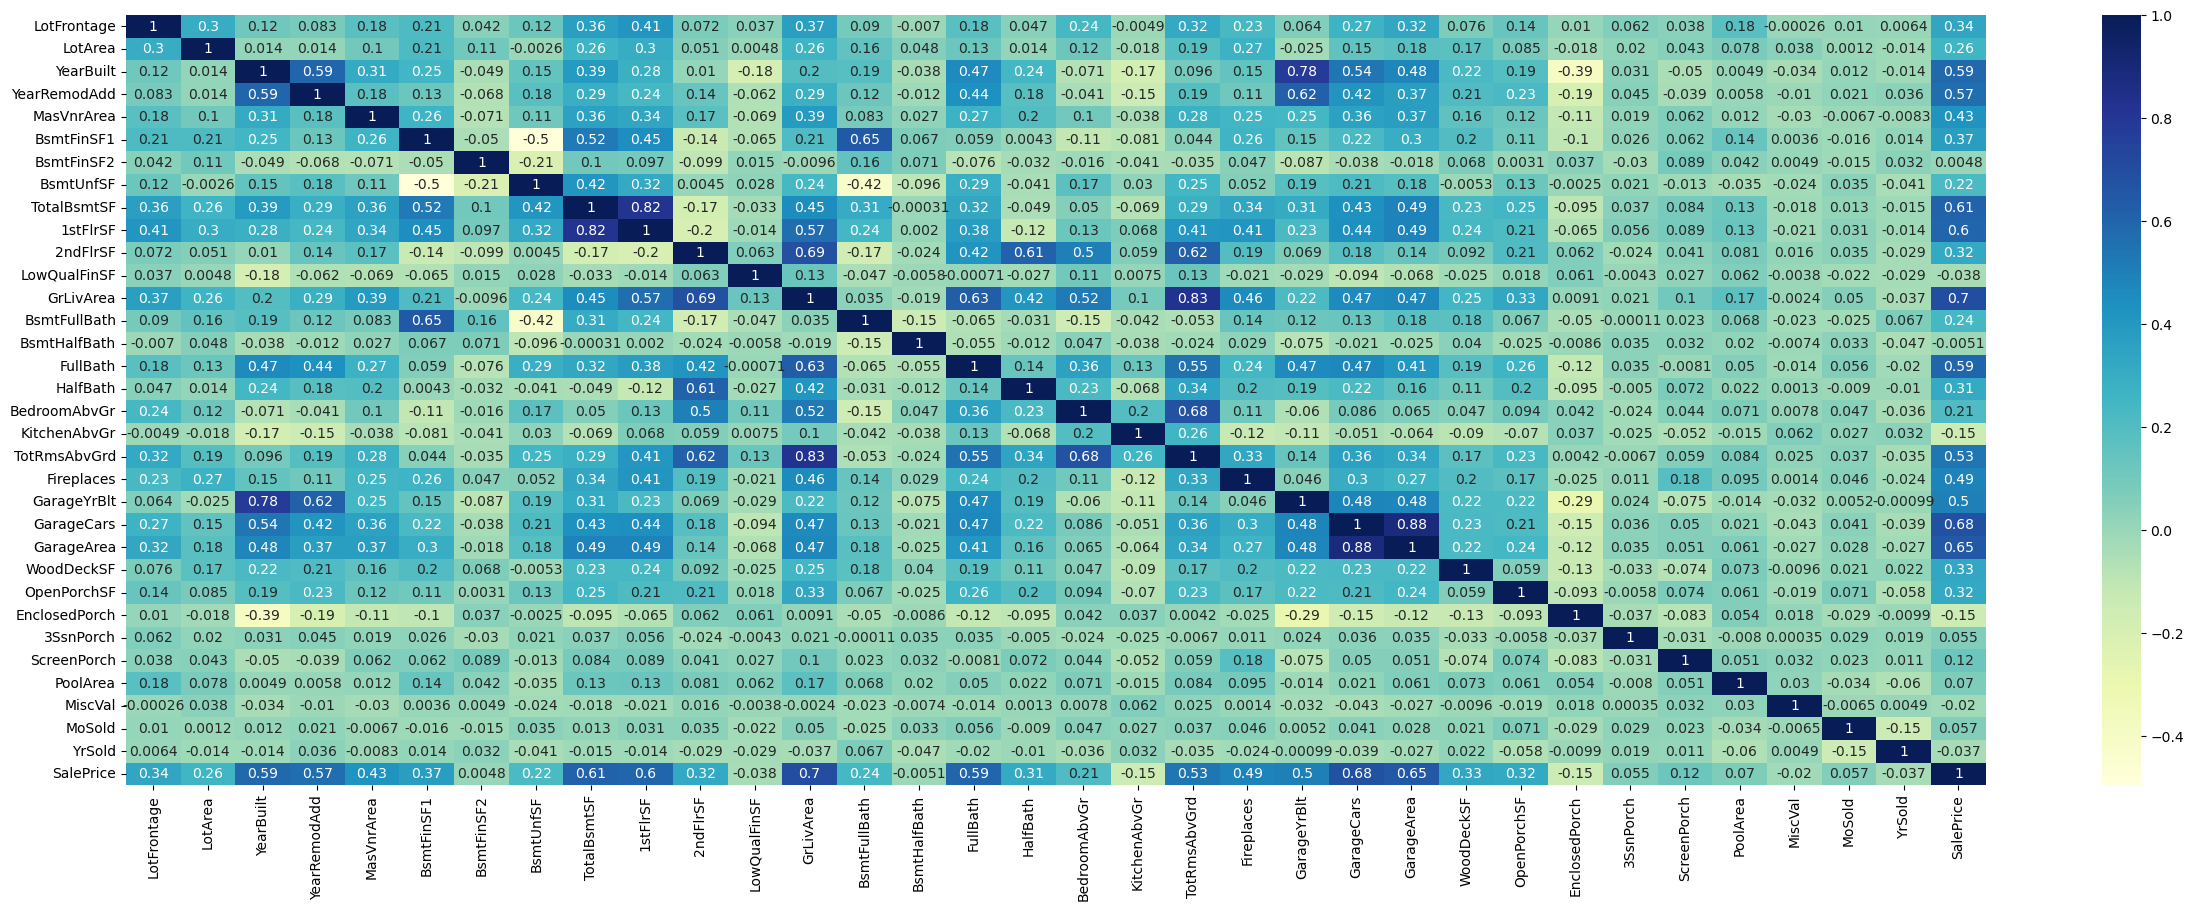

In [70]:
plt.figure(figsize = (30, 10))
sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [71]:
df.corr()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
LotFrontage,1.000000,0.304522,0.116685,0.083348,0.178469,0.214367,0.042463,0.124098,0.363472,0.413773,...,0.075542,0.137014,0.010287,0.061945,0.037655,0.180819,-0.000255,0.010451,0.006380,0.335292
LotArea,0.304522,1.000000,0.014228,0.013788,0.103321,0.214103,0.111170,-0.002618,0.260833,0.299475,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.257320
YearBuilt,0.116685,0.014228,1.000000,0.592855,0.311600,0.249503,-0.049107,0.149040,0.391452,0.281986,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.586570
YearRemodAdd,0.083348,0.013788,0.592855,1.000000,0.176529,0.128451,-0.067759,0.181133,0.291066,0.240379,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.565608
MasVnrArea,0.178469,0.103321,0.311600,0.176529,1.000000,0.261256,-0.071330,0.113862,0.360067,0.339850,...,0.159991,0.122528,-0.109907,0.019144,0.062248,0.011928,-0.029512,-0.006723,-0.008317,0.426775
BsmtFinSF1,0.214367,0.214103,0.249503,0.128451,0.261256,1.000000,-0.050117,-0.495251,0.522396,0.445863,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.372023
BsmtFinSF2,0.042463,0.111170,-0.049107,-0.067759,-0.071330,-0.050117,1.000000,-0.209294,0.104810,0.097117,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,0.004832
BsmtUnfSF,0.124098,-0.002618,0.149040,0.181133,0.113862,-0.495251,-0.209294,1.000000,0.415360,0.317987,...,-0.005316,0.129005,-0.002538,0.020764,-0.012579,-0.035092,-0.023837,0.034888,-0.041258,0.221985
TotalBsmtSF,0.363472,0.260833,0.391452,0.291066,0.360067,0.522396,0.104810,0.415360,1.000000,0.819530,...,0.232019,0.247264,-0.095478,0.037384,0.084489,0.126053,-0.018479,0.013196,-0.014969,0.612134
1stFlrSF,0.413773,0.299475,0.281986,0.240379,0.339850,0.445863,0.097117,0.317987,0.819530,1.000000,...,0.235459,0.211671,-0.065292,0.056104,0.088758,0.131525,-0.021096,0.031372,-0.013604,0.596981


Inference: Variables that look correlated are:
1. GarageCars and GarageArea
2. GrLivArea and TotRmsAbvGrd
3. TotalBsmtSF and 1stFlrSF
4. SalePrice and GrLivArea
5. BedroomAbvGr and GrLivArea
6. BedroomAbvGr and 2ndFlrSF
7. YearBuilt and GarageYrBlt
8. YearBuilt and YearRemodAdd

In [72]:
# Drop the correlated columns: 'GarageCars', 'TotRmsAbvGrd', 'BedroomAbvGr', 'GarageYrBlt'
df.drop(['GarageCars', 'TotRmsAbvGrd', 'BedroomAbvGr', 'GarageYrBlt'], axis=1, inplace=True)

### Derive new variables

In [73]:
# Create a new column named IsRemodelled : 0 if same as construction date if no remodeling or additions else 1

def checkRemodel(row):
    if(row['YearBuilt'] == row['YearRemodAdd']):
        return 0
    else:
        return 1
    
df['IsRemodelled'] = df.apply(checkRemodel, axis=1)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,IsRemodelled
0,2-STORY 1946 & NEWER,RL,65.0,8450,Reg,Inside,CollgCr,Norm,1Fam,2Story,...,61,0,0,0,0,0,2,2008,12.247694,0
1,1-STORY 1946 & NEWER ALL STYLES,RL,80.0,9600,Reg,FR2,Veenker,Feedr,1Fam,1Story,...,0,0,0,0,0,0,5,2007,12.109011,0
2,2-STORY 1946 & NEWER,RL,68.0,11250,IR1,Inside,CollgCr,Norm,1Fam,2Story,...,42,0,0,0,0,0,9,2008,12.317167,1
3,2-STORY 1945 & OLDER,RL,60.0,9550,IR1,Corner,Crawfor,Norm,1Fam,2Story,...,35,272,0,0,0,0,2,2006,11.849398,1
4,2-STORY 1946 & NEWER,RL,84.0,14260,IR1,FR2,NoRidge,Norm,1Fam,2Story,...,84,0,0,0,0,0,12,2008,12.429216,0


In [74]:
df['Age'] = df['YrSold'] - df['YearBuilt']

In [75]:
## Drop the columns from which we created new one
df.drop(['YrSold', 'YearBuilt', 'YearRemodAdd'], axis=1, inplace=True)

In [76]:
# Subset all categorical variables
df_categorical=df.select_dtypes(include=['object'])

In [77]:
# Convert into dummies
df_dummies = pd.get_dummies(df_categorical, drop_first=True)
df_dummies.head()

,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES,MSSubClass_2-1/2 STORY ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_2-STORY PUD - 1946 & NEWER,...,FireplaceQu_NoFireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_BuiltIn,GarageType_Detchd,GarageType_NoGarage,GarageType_Others,GarageFinish_NoGarage,GarageFinish_RFn,GarageFinish_Unf
0,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
4,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0


In [78]:
# Drop categorical variable columns
df = df.drop(list(df_categorical.columns), axis=1)

In [79]:
# Concatenate dummy variables with the original dataframe
df = pd.concat([df, df_dummies], axis=1)

# Model Building and Evaluation (Linear regression model)

## Using RFE: Recursive feature elimination

In [80]:
# Putting feature variable to X
X = df.drop(['SalePrice'], axis=1)
X.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,FireplaceQu_NoFireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_BuiltIn,GarageType_Detchd,GarageType_NoGarage,GarageType_Others,GarageFinish_NoGarage,GarageFinish_RFn,GarageFinish_Unf
0,65.0,8450,196.0,706,0,150,856,856,854,0,...,1,0,0,0,0,0,0,0,1,0
1,80.0,9600,0.0,978,0,284,1262,1262,0,0,...,0,0,1,0,0,0,0,0,1,0
2,68.0,11250,162.0,486,0,434,920,920,866,0,...,0,0,1,0,0,0,0,0,1,0
3,60.0,9550,0.0,216,0,540,756,961,756,0,...,0,0,0,0,1,0,0,0,0,1
4,84.0,14260,350.0,655,0,490,1145,1145,1053,0,...,0,0,1,0,0,0,0,0,1,0


In [81]:
# Putting response variable to y
y = df['SalePrice']
y.head()

0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: SalePrice, dtype: float64

In [82]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

In [83]:
scaler = StandardScaler()

In [84]:
# all numeric (float and int) variables in the dataset
col_numeric = df.select_dtypes(include=['float64', 'int64'])
col_numeric.columns

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'SalePrice', 'IsRemodelled', 'Age'],
      dtype='object')

In [85]:
# Apply scaler() to all numeric columns except the 'dummy' variables
X_train[['LotFrontage', 'LotArea','MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'KitchenAbvGr',
       'Fireplaces','GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal']] = scaler.fit_transform(X_train[['LotFrontage', 'LotArea','MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'KitchenAbvGr',
       'Fireplaces','GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal']])

X_train.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,FireplaceQu_NoFireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_BuiltIn,GarageType_Detchd,GarageType_NoGarage,GarageType_Others,GarageFinish_NoGarage,GarageFinish_RFn,GarageFinish_Unf
210,-0.115302,-0.473765,-0.558025,0.043512,-0.293313,-0.374367,-0.430911,-0.765065,-0.787597,-0.124502,...,1,0,0,0,0,1,0,1,0,0
318,0.926898,-0.056845,0.809137,1.160345,-0.293313,-0.454644,0.621579,0.511914,2.140556,-0.124502,...,0,0,1,0,0,0,0,0,1,0
239,-0.794998,-0.169324,-0.558025,-0.761296,-0.293313,0.171964,-0.712011,-0.930972,0.795996,-0.124502,...,0,0,0,0,1,0,0,0,0,1
986,-0.477806,-0.502297,-0.558025,-0.963574,-0.293313,-0.175904,-1.256778,-0.420683,0.669584,-0.124502,...,1,0,0,0,0,0,0,0,0,1
1416,-0.432493,0.082905,-0.558025,-0.963574,-0.293313,0.475233,-0.620490,0.195183,1.611926,-0.124502,...,1,0,0,0,1,0,0,0,0,1


In [86]:
X_test[['LotFrontage', 'LotArea','MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath','KitchenAbvGr',
       'Fireplaces','GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal']] = scaler.transform(X_test[['LotFrontage', 'LotArea','MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath','KitchenAbvGr',
       'Fireplaces','GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal']])
X_test.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,FireplaceQu_NoFireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_BuiltIn,GarageType_Detchd,GarageType_NoGarage,GarageType_Others,GarageFinish_NoGarage,GarageFinish_RFn,GarageFinish_Unf
1436,-0.432493,-0.144189,-0.558025,0.361992,-0.293313,-0.704396,-0.430911,-0.765065,-0.787597,-0.124502,...,1,0,0,0,1,0,0,0,0,1
57,0.881585,0.112505,-0.558025,-0.963574,-0.293313,0.660317,-0.439628,-0.775120,1.189021,-0.124502,...,1,0,0,0,0,0,0,0,1,0
780,-0.296554,-0.253368,-0.355087,-0.963574,-0.293313,1.500998,0.381881,0.212779,-0.787597,-0.124502,...,0,0,1,0,0,0,0,0,0,0
382,0.428455,-0.120412,-0.558025,-0.963574,-0.293313,0.836481,-0.267481,-0.576535,1.184425,-0.124502,...,1,0,0,0,0,0,0,0,1,0
1170,0.292515,-0.058786,-0.558025,0.159714,-0.293313,0.022559,0.074633,-0.126576,-0.787597,-0.124502,...,0,1,0,0,0,0,0,0,0,0


In [87]:
# RFE with 40 features
lm = LinearRegression()
rfe = RFE(lm, n_features_to_select=40) 
rfe.fit(X_train, y_train)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('LotFrontage', False, 102),
 ('LotArea', False, 105),
 ('MasVnrArea', False, 128),
 ('BsmtFinSF1', False, 90),
 ('BsmtFinSF2', False, 144),
 ('BsmtUnfSF', False, 112),
 ('TotalBsmtSF', False, 135),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', False, 143),
 ('GrLivArea', False, 50),
 ('BsmtFullBath', False, 87),
 ('BsmtHalfBath', False, 127),
 ('FullBath', False, 64),
 ('HalfBath', False, 69),
 ('KitchenAbvGr', False, 60),
 ('Fireplaces', False, 125),
 ('GarageArea', False, 45),
 ('WoodDeckSF', False, 114),
 ('OpenPorchSF', False, 132),
 ('EnclosedPorch', False, 120),
 ('3SsnPorch', False, 115),
 ('ScreenPorch', False, 119),
 ('PoolArea', False, 111),
 ('MiscVal', False, 148),
 ('MoSold', False, 149),
 ('IsRemodelled', False, 140),
 ('Age', False, 142),
 ('MSSubClass_1-1/2 STORY FINISHED ALL AGES', False, 2),
 ('MSSubClass_1-STORY 1945 & OLDER', False, 130),
 ('MSSubClass_1-STORY 1946 & NEWER ALL STYLES', True, 1),
 ('MSSubClass_1-STORY PUD (Planned Unit Developme

In [88]:
col = X_train.columns[rfe.support_]
X_train_rfe = X_train[col]
X_test_rfe = X_test[col]
col

Index(['1stFlrSF', '2ndFlrSF', 'MSSubClass_1-STORY 1946 & NEWER ALL STYLES',
       'MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
       'MSSubClass_2-STORY 1946 & NEWER', 'MSSubClass_SPLIT FOYER',
       'MSSubClass_SPLIT OR MULTI-LEVEL', 'Neighborhood_ClearCr',
       'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_IDOTRR',
       'Neighborhood_MeadowV', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_OldTown', 'Neighborhood_Somerst', 'Neighborhood_StoneBr',
       'Neighborhood_Veenker', 'OverallQual_Excellent', 'OverallQual_Good',
       'OverallQual_Poor', 'OverallQual_Very Good', 'OverallQual_Very Poor',
       'OverallCond_Below Average', 'OverallCond_Excellent',
       'OverallCond_Fair', 'OverallCond_Very Poor', 'Exterior1st_BrkComm',
       'Exterior1st_BrkFace', 'Exterior1st_CBlock', 'Exterior2nd_Brk Cmn',
       'BsmtQual_Fa', 'BsmtQual_Gd', 'BsmtQual_NoBasement', 'BsmtQual_TA',
       'BsmtExposure_Gd', 'BsmtFinType1

In [89]:
y_pred_train = rfe.predict(X_train)
y_pred_test = rfe.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.8635577130054479
0.8315812331600212
21.897928584213098
12.137699862352996
0.02144753044487081
0.02771164352135387


## Ridge Regression

In [90]:
# list of alphas to tune

# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_rfe, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [91]:
model_cv.best_params_

{'alpha': 2.0}

In [92]:
alpha = 2.0
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_rfe, y_train)
print(ridge.coef_)

[ 0.14232006  0.12371142  0.14108926  0.08372452  0.13211322  0.12738109
  0.10873187  0.10415039  0.13826874 -0.10404076 -0.16637419 -0.18218536
  0.12073182  0.16090762 -0.11303941  0.12486482  0.11977578  0.09567045
  0.27276682  0.10889903 -0.30079285  0.1924005  -0.12759695 -0.09821005
  0.14783902 -0.24428672 -0.12759695 -0.13368951  0.08221128 -0.02892744
  0.01141625 -0.18589079 -0.09141954 -0.17818507 -0.18675642  0.12078973
 -0.17818507 -0.08951224 -0.12119511 -0.11399427]


In [93]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train_rfe)
y_pred_test = ridge.predict(X_test_rfe)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.8609971935759241
0.8350006957500438
22.30887208890854
11.891264079767831
0.02185002163458231
0.027149004748328383


In [94]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.002600,0.000794,0.001397,0.000487,0.0001,{'alpha': 0.0001},-0.108475,-0.113567,-0.108027,-0.107482,...,-0.107085,0.005096,18,-0.101421,-0.095739,-0.098401,-0.101703,-0.103094,-0.100071,0.002652
1,0.001998,0.000005,0.000998,0.000002,0.001,{'alpha': 0.001},-0.108475,-0.113565,-0.108028,-0.107481,...,-0.107083,0.005098,17,-0.101420,-0.095739,-0.098402,-0.101702,-0.103095,-0.100072,0.002652
2,0.002505,0.000446,0.001198,0.000397,0.01,{'alpha': 0.01},-0.108477,-0.113546,-0.108043,-0.107473,...,-0.107071,0.005112,16,-0.101417,-0.095740,-0.098408,-0.101696,-0.103105,-0.100073,0.002652
3,0.001999,0.000633,0.001600,0.000490,0.05,{'alpha': 0.05},-0.108484,-0.113462,-0.108107,-0.107437,...,-0.107018,0.005172,15,-0.101404,-0.095753,-0.098434,-0.101669,-0.103149,-0.100082,0.002651
4,0.001800,0.000400,0.001401,0.000491,0.1,{'alpha': 0.1},-0.108488,-0.113363,-0.108181,-0.107392,...,-0.106955,0.005241,13,-0.101386,-0.095789,-0.098464,-0.101641,-0.103199,-0.100096,0.002642


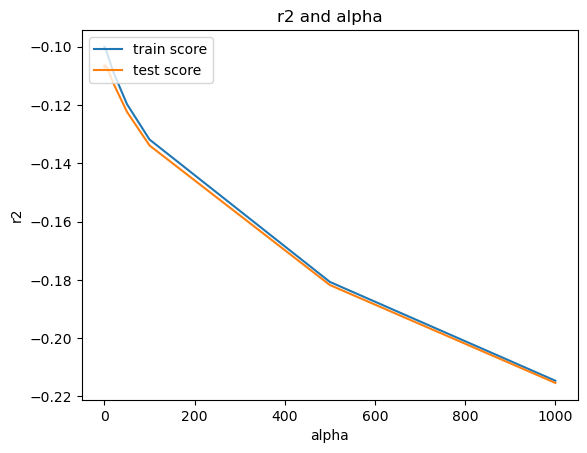

In [95]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('r2')
plt.title("r2 and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [96]:
# Ridge model parameters
model_parameters = list(sorted(ridge.coef_))
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 12.011),
 ('LotFrontage', -0.301),
 ('LotArea', -0.244),
 ('MasVnrArea', -0.187),
 ('BsmtFinSF1', -0.186),
 ('BsmtFinSF2', -0.182),
 ('BsmtUnfSF', -0.178),
 ('TotalBsmtSF', -0.178),
 ('1stFlrSF', -0.166),
 ('2ndFlrSF', -0.134),
 ('LowQualFinSF', -0.128),
 ('GrLivArea', -0.128),
 ('BsmtFullBath', -0.121),
 ('BsmtHalfBath', -0.114),
 ('FullBath', -0.113),
 ('HalfBath', -0.104),
 ('KitchenAbvGr', -0.098),
 ('Fireplaces', -0.091),
 ('GarageArea', -0.09),
 ('WoodDeckSF', -0.029),
 ('OpenPorchSF', 0.011),
 ('EnclosedPorch', 0.082),
 ('3SsnPorch', 0.084),
 ('ScreenPorch', 0.096),
 ('PoolArea', 0.104),
 ('MiscVal', 0.109),
 ('MoSold', 0.109),
 ('IsRemodelled', 0.12),
 ('Age', 0.121),
 ('MSSubClass_1-1/2 STORY FINISHED ALL AGES', 0.121),
 ('MSSubClass_1-STORY 1945 & OLDER', 0.124),
 ('MSSubClass_1-STORY 1946 & NEWER ALL STYLES', 0.125),
 ('MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER', 0.127),
 ('MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES', 0.132),
 ('MSSubCl

Text(0, 0.5, 'y_pred_test')

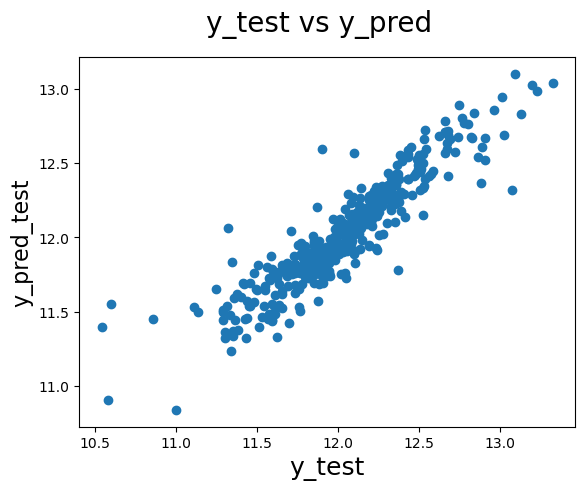

In [97]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred_test)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred_test', fontsize=16)    

## Lasso Regression

In [98]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000 ]}
lasso = Lasso()

# cross validation
lasso_model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
lasso_model_cv.fit(X_train_rfe, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [99]:
## View the optimal value of alpha
lasso_model_cv.best_params_

{'alpha': 0.0001}

In [100]:
lasso_model_cv.cv_results_

{'mean_fit_time': array([0.00259776, 0.00199814, 0.00199823, 0.0021008 , 0.00219989,
        0.0022006 , 0.00199304, 0.00181246, 0.00228844, 0.00239887,
        0.00219984, 0.00180092, 0.00189986, 0.00199976, 0.0019999 ,
        0.002     , 0.00180073, 0.00198646, 0.00199971, 0.00200009,
        0.00199986, 0.00220056, 0.00160022, 0.00219998, 0.00140004,
        0.00210214, 0.00239949]),
 'std_fit_time': array([8.00650518e-04, 3.31873181e-06, 3.24599694e-06, 2.02131412e-04,
        4.00066404e-04, 3.99710067e-04, 8.52938926e-06, 4.07014272e-04,
        6.09010019e-04, 4.91721603e-04, 3.99852037e-04, 7.48494806e-04,
        1.99033201e-04, 1.16800773e-07, 6.28991411e-07, 2.43140197e-07,
        4.00417694e-04, 2.99237258e-05, 5.35248383e-07, 3.69356475e-07,
        2.61174468e-07, 3.99733969e-04, 4.89551189e-04, 4.00137940e-04,
        4.90037648e-04, 2.05169847e-04, 4.90916265e-04]),
 'mean_score_time': array([0.00140219, 0.00120196, 0.0012002 , 0.00100012, 0.00140009,
        0.001218

In [101]:
cv_result_lasso = pd.DataFrame(lasso_model_cv.cv_results_)
cv_result_lasso.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.002598,0.000801,0.001402,7.992827e-04,0.0001,{'alpha': 0.0001},-0.108613,-0.112774,-0.108438,-0.107250,...,-0.106915,0.005066,1,-0.101460,-0.096049,-0.098515,-0.101601,-0.103387,-0.100202,0.002599
1,0.001998,0.000003,0.001202,4.035951e-04,0.001,{'alpha': 0.001},-0.109587,-0.113613,-0.113288,-0.108068,...,-0.109324,0.004206,2,-0.104232,-0.100821,-0.101562,-0.103988,-0.107002,-0.103521,0.002190
2,0.001998,0.000003,0.001200,3.999473e-04,0.01,{'alpha': 0.01},-0.132055,-0.148898,-0.154476,-0.142650,...,-0.146333,0.008281,3,-0.144309,-0.141353,-0.140569,-0.143799,-0.143326,-0.142671,0.001452
3,0.002101,0.000202,0.001000,9.536743e-08,0.1,{'alpha': 0.1},-0.239635,-0.245489,-0.237913,-0.237678,...,-0.243125,0.006533,4,-0.245030,-0.238618,-0.241937,-0.242617,-0.245053,-0.242651,0.002375
4,0.002200,0.000400,0.001400,4.898041e-04,0.2,{'alpha': 0.2},-0.295575,-0.300382,-0.289792,-0.280241,...,-0.294959,0.009642,5,-0.293489,-0.293878,-0.296526,-0.292779,-0.294701,-0.294275,0.001285


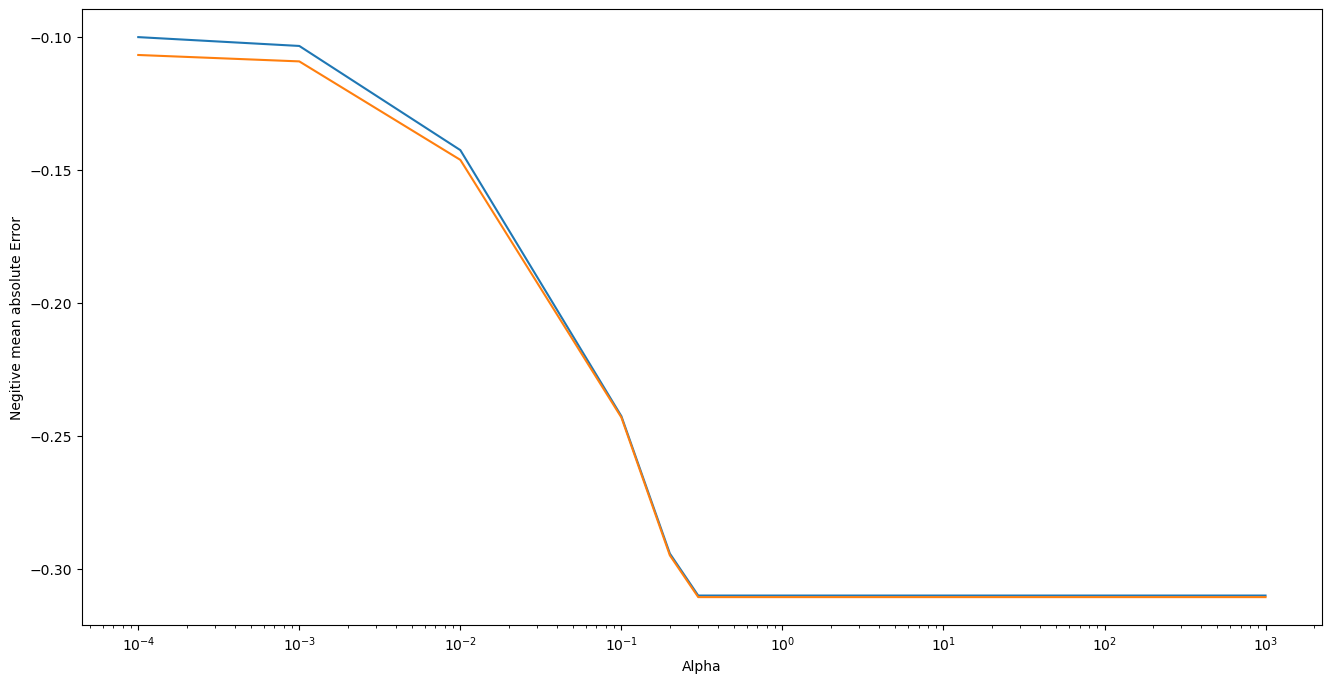

In [102]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

plt.figure(figsize=(16,8))
plt.plot(cv_result_lasso['param_alpha'],cv_result_lasso['mean_train_score'])
plt.plot(cv_result_lasso['param_alpha'],cv_result_lasso['mean_test_score'])
plt.xscale('log')
plt.ylabel('Negitive mean absolute Error')
plt.xlabel('Alpha')
plt.show()

In [103]:
alpha = 0.0001
lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_rfe, y_train)

Lasso(alpha=0.0001)

In [104]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train_rfe)
y_pred_test = lasso.predict(X_test_rfe)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.8632112573410496
0.8337701063500373
21.9535320306497
11.979950899362372
0.0215019902357
0.02735148607160359


In [105]:
# lasso model parameters
model_parameters = list(sorted(lasso.coef_))
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list((zip(cols, model_parameters)))

[('constant', 12.02),
 ('LotFrontage', -0.559),
 ('LotArea', -0.405),
 ('MasVnrArea', -0.289),
 ('BsmtFinSF1', -0.25),
 ('BsmtFinSF2', -0.241),
 ('BsmtUnfSF', -0.213),
 ('TotalBsmtSF', -0.202),
 ('1stFlrSF', -0.199),
 ('2ndFlrSF', -0.166),
 ('LowQualFinSF', -0.12),
 ('GrLivArea', -0.118),
 ('BsmtFullBath', -0.113),
 ('BsmtHalfBath', -0.103),
 ('FullBath', -0.1),
 ('HalfBath', -0.098),
 ('KitchenAbvGr', -0.095),
 ('Fireplaces', -0.086),
 ('GarageArea', -0.005),
 ('WoodDeckSF', -0.0),
 ('OpenPorchSF', 0.041),
 ('EnclosedPorch', 0.081),
 ('3SsnPorch', 0.087),
 ('ScreenPorch', 0.103),
 ('PoolArea', 0.11),
 ('MiscVal', 0.112),
 ('MoSold', 0.112),
 ('IsRemodelled', 0.121),
 ('Age', 0.121),
 ('MSSubClass_1-1/2 STORY FINISHED ALL AGES', 0.126),
 ('MSSubClass_1-STORY 1945 & OLDER', 0.129),
 ('MSSubClass_1-STORY 1946 & NEWER ALL STYLES', 0.13),
 ('MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER', 0.134),
 ('MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES', 0.138),
 ('MSSubClass_2 F

Text(0, 0.5, 'y_pred_test')

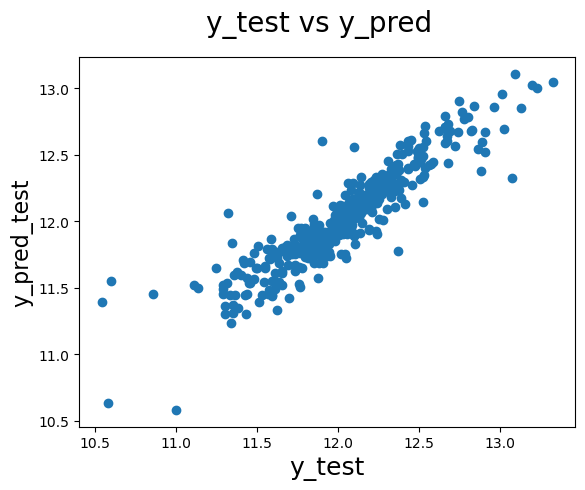

In [106]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred_test)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred_test', fontsize=16)    

# Comparison of metrics derived using Lasso and Ridge regression

In [107]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.863558,0.860997,0.863211
1,R2 Score (Test),0.831581,0.835001,0.833770
2,RSS (Train),21.897929,22.308872,21.953532
3,RSS (Test),12.137700,11.891264,11.979951
4,MSE (Train),0.146450,0.147818,0.146636
5,MSE (Test),0.166468,0.164770,0.165383


In [108]:
betas = pd.DataFrame(index=col)
betas.rows = col

In [109]:
betas['Ridge'] = ridge.coef_


In [110]:
betas['Lasso'] = lasso.coef_

In [111]:
pd.set_option('display.max_rows', None)
betas.head(68)

,Ridge,Lasso
1stFlrSF,0.142320,0.138009
2ndFlrSF,0.123711,0.121487
MSSubClass_1-STORY 1946 & NEWER ALL STYLES,0.141089,0.142981
MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,0.083725,0.081500
MSSubClass_2-STORY 1946 & NEWER,0.132113,0.133752
MSSubClass_SPLIT FOYER,0.127381,0.138020
MSSubClass_SPLIT OR MULTI-LEVEL,0.108732,0.112259
Neighborhood_ClearCr,0.104150,0.111916
Neighborhood_Crawfor,0.138269,0.145858
Neighborhood_Edwards,-0.104041,-0.100261


In [112]:
betas['Lasso'].sort_values(ascending=False)

OverallQual_Excellent                                               0.286893
OverallQual_Very Good                                               0.195141
OverallCond_Excellent                                               0.166315
Neighborhood_NridgHt                                                0.159080
Neighborhood_Crawfor                                                0.145858
MSSubClass_1-STORY 1946 & NEWER ALL STYLES                          0.142981
MSSubClass_SPLIT FOYER                                              0.138020
1stFlrSF                                                            0.138009
MSSubClass_2-STORY 1946 & NEWER                                     0.133752
Neighborhood_StoneBr                                                0.129646
Neighborhood_NoRidge                                                0.129371
Neighborhood_Somerst                                                0.125614
2ndFlrSF                                                            0.121487

# Conclusion: Top 10 most significant variables affecting sale price are:

1. OverallQual_Excellent                                               
2. OverallQual_Very Good                                               
3. OverallCond_Excellent                                               
4. Neighborhood_NridgHt                                               
5. Neighborhood_Crawfor                                                
6. MSSubClass_1-STORY 1946 & NEWER ALL STYLES                          
7. MSSubClass_SPLIT FOYER                                              
8. 1stFlrSF                                                            
9. MSSubClass_2-STORY 1946 & NEWER                                     
10. Neighborhood_StoneBr                                                     